In [ ]:
import networkx as nx
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

   
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

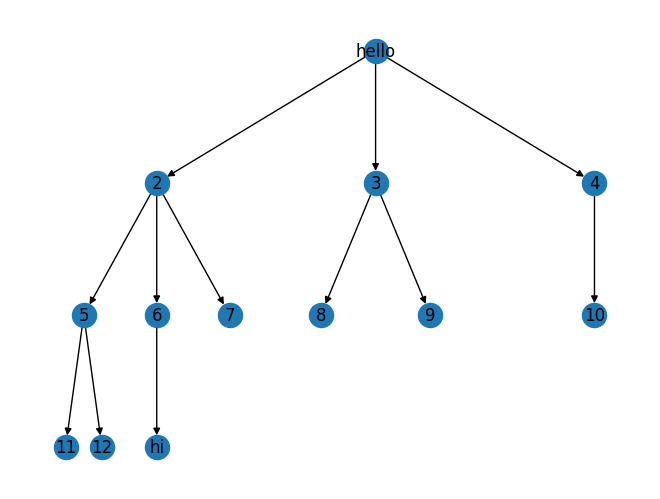

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
G=nx.DiGraph()
G.add_edges_from([("hello",2), ("hello",3), ("hello",4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10),
                  (5,11), (5,12), (6,"hi")])
pos = hierarchy_pos(G,"hello")    
nx.draw(G, pos=pos, with_labels=True)
plt.savefig('hierarchy.png')

In [ ]:
G.add_edges_from([("hi","ram")])

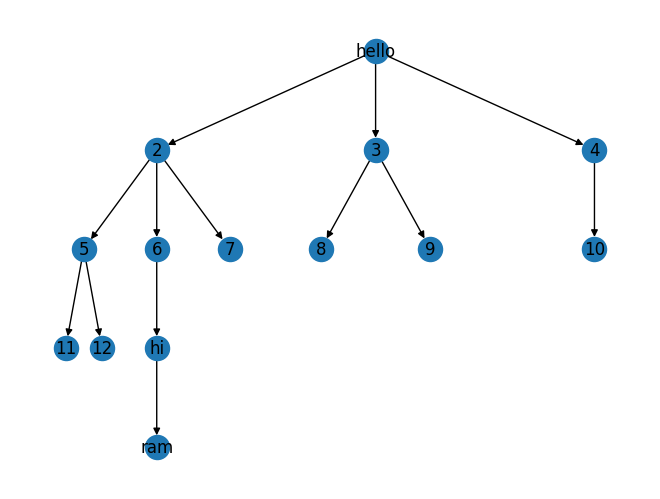

In [ ]:
pos = hierarchy_pos(G,"hello")    
nx.draw(G, pos=pos, with_labels=True)
plt.savefig('hierarchy.png')

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])


In [ ]:
font_download_url = "https://fonts.google.com/download?family=Noto%20Sans%20Devanagari"
change_matplotlib_font(font_download_url)

font family:  ['Noto Sans Devanagari']


<ipython-input-7-a330f8df5830>:97: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  plt.savefig('hierarchy.png')
<ipython-input-7-a330f8df5830>:97: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.savefig('hierarchy.png')
<ipython-input-7-a330f8df5830>:97: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  plt.savefig('hierarchy.png')
<ipython-input-7-a330f8df5830>:97: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from current font.
  plt.savefig('hierarchy.png')
<ipython-input-7-a330f8df5830>:97: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  plt.savefig('hierarchy.png')
<ipython-input-7-a330f8df5830>:97: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  plt.savefig('hierarchy.png')
<ipython-input-7-a330f8df5830>:97: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  plt.savefig('hierarch

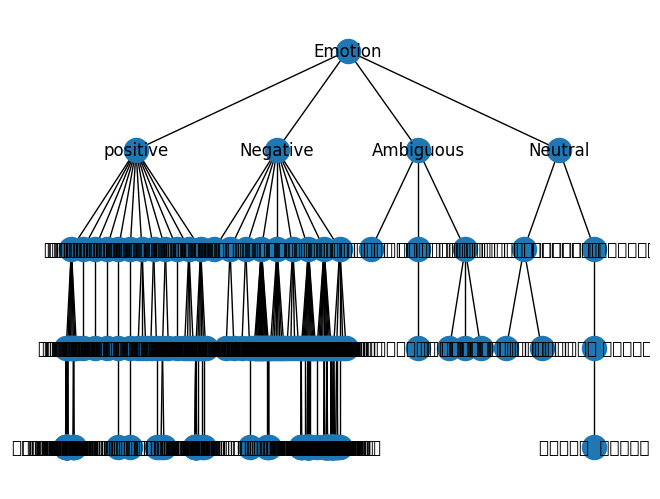

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
x=0.2
y=0.2
G=nx.Graph()
G.add_edges_from([("Emotion","positive"),("Emotion","Negative"),("Emotion","Ambiguous"),("Emotion","Neutral"),("positive","प्यार"),("प्यार","स्नेह"),
                  ("प्यार","वासना"),("प्यार","लालसा"),("प्यार","भक्ति"),("प्यार","मुस्कान"),("प्यार","भलाई"),("प्यार","निष्ठा"),("प्यार","उत्तम"),("स्नेह","आराधना"),("स्नेह","पसंद"),("स्नेह", "आकर्षण"),
                  ("स्नेह","ख़ुशमिज़ाजी"),("स्नेह", "देखभाल"),("स्नेह", "कोमलता"),("स्नेह", "करुणा"),("स्नेह", "भावुकता"),("स्नेह","अनुरक्ति"),("स्नेह","प्रशंसनीय"),
		
		("स्नेह","नरम जगह"),
  		 ("स्नेह","संबद्ध"),("वासना","इच्छा"),("वासना", "जुनून"),("वासना","दिलचस्पी"),
                  ("वासना", "मोह"),("भलाई" ,"उपकार"),("भलाई","शुक्रिया "),("भलाई","आभार"),("भलाई","शुभकामना"),("positive","कृतज्ञता"),( "कृतज्ञता","सुंदरता"),("positive","छिछोरापन" ),("छिछोरापन" , "शोख़ी"),

("positive","सकारात्मक भय") ,("सकारात्मक भय","उत्साह"),

("positive","निर्भयता" ),("निर्भयता","सुरक्षा"),("सुरक्षा" ,"आत्मविश्वास"),

("positive","सकारात्मक अपेक्षा") ,("सकारात्मक अपेक्षा", "प्रत्याशा"), ("प्रत्याशा","सकारात्मक रहस्य"),

("positive","स्वाभिमान" ),("स्वाभिमान" ,"आत्म सम्मान"),
		      ("स्वाभिमान" ,"प्रेम प्रसंगयुक्त"),
		      ("स्वाभिमान" ,"अहंकार"),("positive","जोश" ),("जोश","अधिकता"),
		("जोश", "उत्सुकता"),  ("उत्सुकता","उत्साह की ललक"),

("positive","सकारात्मक आशा" ),("सकारात्मक आशा","आशावाद"),
		      ("सकारात्मक आशा", "प्रोत्साहन"),
		       ("सकारात्मक आशा","आशावाद")  ,("आशावाद","रक्तपात"),

("positive","आश्चर्य" ),("आश्चर्य" ,"विस्मय"),

("positive","शांति"), ("शांति","सौम्यता"),
		 ("शांति","ठंडक") , ("शांति", "सुगमता"),("शांति", "सकारात्मक लंगूर"),
     ("positive","खुशी"),("खुशी","प्रसन्नता"),("खुशी","उत्तेजकता"),("खुशी","संतोष"),("खुशी","अभिमान" ),("खुशी","रोमांच "),("खुशी","राहत" ),
		("प्रसन्नता","मनोरंजन"),("प्रसन्नता", "आनंद"),("प्रसन्नता", "उल्लास"),("प्रसन्नता", "संतुष्टि"),("प्रसन्नता", "परमानंद"),("प्रसन्नता", "विनोद"),("प्रसन्नता", "सुख"), ("प्रसन्नता","चैन"),
("प्रसन्नता", "आमोद"),("प्रसन्नता", "प्रमोद"),("प्रसन्नता", "हर्ष"),("प्रसन्नता", "आह्लाद"),("उत्तेजकता","ज़िंदादिली"),
		("अभिमान" ,"विजय"),
	("आशावाद" , "आशा"),
		("रोमांच ", "उमंग"),("Negative","अकृतज्ञता "),
("Negative","दीनता"),
		("दीनता","स्व मूल्यह्रास"),
		("दीनता","नम्रता"),
("Negative","दया"),
		("दया","समवेदना"),
		("दया","रहम"),("रहम","माफी"),
		("Negative","चिंता"),
		("चिंता","बेचैनी"),
		("चिंता","संकट"),
		("चिंता","नकारात्मक-चिंता"),
		("चिंता","सनकीपन"),
		("चिंता","असुरक्षा"),
		("चिंता","उतावलापन"),
		("चिंता","डूब"),
		("चिंता","संदेह"),
		("चिंता","निराशाजनकता"),
		("चिंता","असंतोष"),
		("चिंता","अधर्म"),("चिंता","असफलता"),
		("चिंता","रोग"),("रोग","बीमारी"),("चिंता","बेईमानी"),
		("चिंता","नकारात्मक-आंदोलन"),("नकारात्मक-आंदोलन","गुल्म"),("नकारात्मक-आंदोलन","चंचलता"),
("Negative","शर्म"),	
		("शर्म","अपराधबोध"),("शर्म","बेकारी"),("शर्म", "पछतावा"),("शर्म", "पश्चात्ताप "),("शर्म","अन्याय"),
		("शर्म","उलझन"),("शर्म","अश्लीलता"),("शर्म","निराधार"),
		("Negative","नापसन्द"),
		("नापसन्द","अनिच्छा"),
		("नापसन्द","गंदगी"),
		("नापसन्द","अस्वीकृति"),
		("नापसन्द","अवमानना"),

("Negative","क्रोध"),
		("क्रोध","चिड़चिड़ापन" ),("क्रोध","दुष्टता"),("क्रोध","कोप"),("चिड़चिड़ापन", "आंदोलन"),("चिड़चिड़ापन", "झुंझलाहट"),("चिड़चिड़ापन", "क्रोधी"),("चिड़चिड़ापन", "क्रॉसपैच"),
		("क्रोध","उत्तेजना"), ("क्रोध","निष्ठुरता"),("उत्तेजना","हतोत्साहित"),
		("क्रोध","गुस्सा"),  ("गुस्सा","आक्रोश"),("गुस्सा", "रोष"),("गुस्सा", "शत्रुता"),("गुस्सा", "उग्रता"),("गुस्सा", "कड़वाहट"),("गुस्सा", "तिरस्कार"),("गुस्सा", "बावजूद"),("गुस्सा", "प्रतिशोध"),("गुस्सा", "नाराजगी"),
		("क्रोध","घृणा"), ("घृणा","आक्षेप"),("घृणा","नफरत" ),("घृणा","अनचाहा"),("घृणा","अयोग्यता"),
		("क्रोध","जलन" ),("जलन","ईर्ष्या"),("क्रोध","निराकुलता"),
		("क्रोध","यातना"),("क्रोध","झगड़ा"),("क्रोध","विवाद"),
		("Negative","पीड़ा"),
		("Negative","डर"),
 		("डर","संत्रास"),  ("संत्रास" ,"चेतावनी"),("संत्रास"  ,"आघात"),("संत्रास"  , "झटका"),("संत्रास" , "भय"),("संत्रास", "आतंक"),("संत्रास" , "उन्माद"),("संत्रास" , "मृत्यु"),
		("डर","घबराहट"),("घबराहट" , "सस्पेंस" ),("घबराहट" ,"कुतूहल"),("घबराहट" , "आशंका"),
		("डर","कातरता"),("कातरता","संशय"),("डर","बुजदिलता"),("डर","विवशता"),
		("पीड़ा","वेदना") , ("वेदना","चोट"),("पीड़ा","तंगी"),("पीड़ा","दुर्भाग्य"),("पीड़ा","निर्बलता"),("पीड़ा","असहिष्णुता"),
		("पीड़ा","निराशा"),("पीड़ा","निरस्ता"),("निराशा","निर्दयता"),("निराशा","निराश्रित"),("निराशा","निरश्रय"),
		("पीड़ा","उदासी"),("उदासी","निरावेश"), ("पीड़ा","दुर्घटना"),("पीड़ा","बुराई"),("उदासी","अवसाद"),("उदासी","निरुत्साहित"),("उदासी"," निराशा"),("उदासी", "विषाद"),("उदासी" ,"अंधेरा "),("उदासी"," दुःख"),("उदासी", "शोक"),("उदासी","विपत्ति"),("उदासी" , "विषण्ण"),
		("पीड़ा","उपेक्षा"), ("उपेक्षा","अलगाव"),("उपेक्षा", "पराजयवाद"),("उपेक्षा", "शर्मिंदगी"),("उपेक्षा", "गृहासक्त"),("उपेक्षा", "अपमान"),("उपेक्षा", "अनादर"),("उपेक्षा", "अकेलापन"),
		("Neutral","उदासीनता निठुराई" ),( "उदासीनता निठुराई","तटस्थ ला"), ("उदासीनता निठुराई","शुष्कता "),
		("Neutral","तटस्थ असंबद्ध"),("तटस्थ असंबद्ध","उदासीनता विरक्ति"),("उदासीनता विरक्ति", "फासला  वापसी"),
		("Ambiguous","अस्पष्ट भय" ),("Ambiguous","अस्पष्ट अपेक्षा"),("अस्पष्ट अपेक्षा","अस्पष्ट आशा"),("Ambiguous","अस्पष्ट स्थिति"),("अस्पष्ट स्थिति","कोलाहल"),("अस्पष्ट स्थिति","सनसनी"),

                     ("अस्पष्ट स्थिति","हलचल")

            
                                

])
pos = hierarchy_pos(G,"Emotion")    
nx.draw(G, pos=pos, with_labels=True,font_family='Hindi')
 
plt.savefig('hierarchy.png')

In [ ]:
print(G.neighbors("positive"))

In [ ]:
G['प्यार']

AtlasView({'positive': {}, 'स्नेह': {}, 'वासना': {}, 'लालसा': {}, 'भक्ति': {}, 'मुस्कान': {}, 'भलाई': {}, 'निष्ठा': {}, 'उत्तम': {}})

In [ ]:
nodes = list(nx.dfs_postorder_nodes(G, source="positive"))
print(nodes)

['अकृतज्ञता ', 'स्व मूल्यह्रास', 'नम्रता', 'दीनता', 'समवेदना', 'माफी', 'रहम', 'दया', 'बेचैनी', 'संकट', 'नकारात्मक-चिंता', 'सनकीपन', 'असुरक्षा', 'उतावलापन', 'डूब', 'संदेह', 'निराशाजनकता', 'असंतोष', 'अधर्म', 'असफलता', 'बीमारी', 'रोग', 'बेईमानी', 'गुल्म', 'चंचलता', 'नकारात्मक-आंदोलन', 'चिंता', 'अपराधबोध', 'बेकारी', 'पछतावा', 'पश्चात्ताप ', 'अन्याय', 'उलझन', 'अश्लीलता', 'निराधार', 'शर्म', 'अनिच्छा', 'गंदगी', 'अस्वीकृति', 'अवमानना', 'नापसन्द', 'आंदोलन', 'झुंझलाहट', 'क्रोधी', 'क्रॉसपैच', 'चिड़चिड़ापन', 'दुष्टता', 'कोप', 'हतोत्साहित', 'उत्तेजना', 'निष्ठुरता', 'आक्रोश', 'रोष', 'शत्रुता', 'उग्रता', 'कड़वाहट', 'तिरस्कार', 'बावजूद', 'प्रतिशोध', 'नाराजगी', 'गुस्सा', 'आक्षेप', 'नफरत', 'अनचाहा', 'अयोग्यता', 'घृणा', 'ईर्ष्या', 'जलन', 'निराकुलता', 'यातना', 'झगड़ा', 'विवाद', 'क्रोध', 'चोट', 'वेदना', 'तंगी', 'दुर्भाग्य', 'निर्बलता', 'असहिष्णुता', 'निर्दयता', 'निराश्रित', 'निरश्रय', 'निराशा', 'निरस्ता', 'निरावेश', 'अवसाद', 'निरुत्साहित', ' निराशा', 'विषाद', 'अंधेरा ', ' दुःख', 'शोक', 'विपत्ति', 'विषण्ण',

In [ ]:
print(len(nodes))

224


In [ ]:
import sys
!{sys.executable} -m pip install pyiwn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import sys
#!{sys.executable} -m pip install pyiwn
import pyiwn

list(map(str, pyiwn.Language))

[██████████████████████████████████████████████████]


['Language.ASSAMESE',
 'Language.BENGALI',
 'Language.BODO',
 'Language.GUJARATI',
 'Language.HINDI',
 'Language.KANNADA',
 'Language.KASHMIRI',
 'Language.KONKANI',
 'Language.MALAYALAM',
 'Language.MARATHI',
 'Language.MEITEI',
 'Language.NEPALI',
 'Language.ORIYA',
 'Language.PUNJABI',
 'Language.SANSKRIT',
 'Language.TAMIL',
 'Language.TELUGU',
 'Language.URDU']

In [ ]:
iwn = pyiwn.IndoWordNet()

# to use other language wordnet(s), use:
# iwn = pyiwn.IndoWordNet(lang=pyiwn.Language.KANNADA)
#print(if iwn.synsets('स्व मूल्यह्रास'))
aam_all_synsets = iwn.synsets('घबराहट')
aam = aam_all_synsets[0]
print(aam.lemma_names())

['अशांति', 'अशान्ति', 'घबराहट', 'सनसनी', 'उद्वेग', 'अकुलाहट', 'घबड़ाहट', 'क्षोभ']


In [ ]:
print(len(aam_all_synsets))
emot = ["Emotion","positive","Negative","Ambiguous","Neutral"]

1


In [ ]:
for word in nodes:
  #print(word)
  if word not in emot:
    try:
      synSets = iwn.synsets(word)
      for x in range(len(synSets)):
        sets = synSets[x]
        lemmas = sets.lemma_names()
        for relatedWord in lemmas:
          #print(relatedWord)
          if relatedWord not in nodes:
            G.add_edges_from([(word, relatedWord)])
    except KeyError:
      continue



In [ ]:
nodes = list(nx.dfs_postorder_nodes(G, source="positive"))
print(len(nodes))

2671


In [ ]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=f1bbb51a1c766c76320cc9fea81999d1d12827b9415b501bd2c87394e97ce7fc
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
import stanza

# download the language model
stanza.download('hi')

# load the model
nlp = stanza.Pipeline('hi')

# example text
text = "मैं स्टान्जा लाइब्रेरी का उपयोग करके प्राकृतिक भाषा प्रसंस्करण सीख रहा हूँ।"

# process the text and get the POS tags
doc = nlp(text)
for sentence in doc.sentences:
    for word in sentence.words:
        print(word.text, word.pos)


INFO:stanza:Downloading default packages for language: hi (Hindi) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: hi (Hindi):
| Processor | Package |
-----------------------
| tokenize  | hdtb    |
| pos       | hdtb    |
| lemma     | hdtb    |
| depparse  | hdtb    |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


मैं PRON
स्टान्जा PROPN
लाइब्रेरी PROPN
का ADP
उपयोग NOUN
करके VERB
प्राकृतिक ADJ
भाषा NOUN
प्रसंस्करण NOUN
सीख VERB
रहा AUX
हूँ AUX
। PUNCT


In [ ]:
# example text
text = "राम को सीता से प्रेम है"
l=[]
# process the text and get the POS tags
doc = nlp(text)
#print(doc)
for sentence in doc.sentences:
    for word in sentence.words:
        if word.pos in ["NOUN" , "ADJ" ,"CCONJ" , "CCONJ"] :
          print(word.text, word.pos)
          l.append(word.text)


प्रेम NOUN


In [ ]:
l

['प्रेम']

In [ ]:
def search(elem, graph):
    # Traverse the graph to find all parent nodes of the target element
    parent_nodes = set()
    visited = set()
    queue = [(elem, None)]
    visited.add(elem)
    while queue:
        curr_node, parent = queue.pop(0)
        for child in graph[curr_node]:
            if child not in visited:
                queue.append((child, curr_node))
                visited.add(child)
        if parent is not None:
            parent_nodes.add(parent)

    # Create a subgraph containing all parent nodes
    subgraph = {}
    for node in parent_nodes:
        subgraph[node] = graph[node]
    return subgraph


In [ ]:

# subgraph = search('शांति', G)

# for node in subgraph.items():
#     print(node)

In [ ]:
# Example graph
graph = {
    'A': ['AB', 'AC'],
    'AB': ['D', 'E','AF'],
    'AC': ['AF', 'G'],
    'D': [],
    'E': [],
    'AF': [],
    'G': []
}

# Function to traverse the graph and get the parents of a particular node
def get_parents(graph, start_node, target_node):
    visited = set()
    parent_dict = {start_node: []}
    dfs(graph, start_node, target_node, visited, parent_dict)
    if target_node in parent_dict:
        return parent_dict[target_node]
    else:
        return []

# Recursive function to perform DFS and update the parent_dict
def dfs(graph, node, target_node, visited, parent_dict):
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            parent_dict[neighbor] = parent_dict[node] + [node]
            dfs(graph, neighbor, target_node, visited, parent_dict)


In [ ]:
get_parents(G,'positive','खुश')

[]

In [ ]:

for node in l:
  print(get_parents(G,'Emotion',node))

['Emotion', 'positive', 'प्यार', 'स्नेह', 'पसंद', 'रुचि', 'अनुरक्ति', 'चाह', 'इच्छा', 'वासना', 'जुनून', 'धुन', 'चिंता', 'Negative', 'दीनता', 'नम्रता', 'विनम्रता', 'कोमलता', 'व्रीड़न', 'शर्म', 'पछतावा', 'अनुशय', 'झगड़ा', 'क्रोध', 'चिड़चिड़ापन', 'आंदोलन', 'आन्दोलन', 'हलचल', 'अस्पष्ट स्थिति', 'सनसनी', 'अशांति', 'बेचैनी', 'अकुलाहट', 'घबराहट', 'डर', 'संत्रास', 'आघात', 'वार', 'चोट', 'वेदना', 'पीड़ा', 'तंगी', 'कमी', 'बुराई', 'अवगुण', 'दुष्टता', 'कमीनापन', 'छिछोरापन', 'शोख़ी', 'चपलता', 'चंचलता', 'रवानी', 'उग्रता', 'गुस्सा', 'आक्रोश', 'रुष्टि', 'कोप', 'खुन्नस', 'रोष', 'अनखाहट', 'नाराजगी', 'अप्रसन्नता', 'असंतोष', 'खिन्नता', 'उदासी', 'अवसाद', 'शामनी', 'शांति', 'इतमीनान', 'संतुष्टि', 'प्रसन्नता', 'खुशी', 'संतोष', 'तोष', 'आनंद', 'ख़ुशी', 'उल्लास', 'आनन्द', 'आमोद', 'मजा', 'प्रमोद', 'मज़ा', 'हर्ष', 'तफरीह', 'विनोद', 'कौतुक', 'कुतूहल', 'जिज्ञासा', 'उत्सुकता', 'जोश', 'गर्मजोशी', 'उत्साह', 'उछाह', 'उमंग', 'सरगर्मी', 'उत्तेजना', 'त्रसन', 'भय', 'आशङ्का', 'संदेह', 'सन्देह', 'आशंका', 'अंदेशा', 'उलझन', 'अन्द

In [ ]:
def find_parents(graph, node):
    parents = []
    queue = [node]
    while queue:
        current_node = queue.pop(0)
        for parent in graph:
            if current_node in graph[parent]:
                parents.append(parent)
                queue.append(parent)
    return parents



In [ ]:
def create_subgraph(graph, key_node):
    subgraph = nx.DiGraph()
    if not graph:
        return subgraph
    for node in find_parents(graph, key_node):
        subgraph.add_node(node)
        if node in graph.nodes():
            for parent in find_parents(graph, node):
                subgraph.add_edge(parent, node)
    subgraph.add_node(key_node)
    for parent in find_parents(graph, key_node):
        if parent in subgraph.nodes:
            subgraph.add_edge(parent, key_node)
    return subgraph


In [ ]:
print("Upstream Edges of 'B' (just example)-->")
for node in l:
  print(list(nx.edge_dfs(G,node)))

Upstream Edges of 'B' (just example)-->
[('प्रेम', 'स्नेह'), ('स्नेह', 'प्यार'), ('प्यार', 'positive'), ('positive', 'Emotion'), ('Emotion', 'Negative'), ('Negative', 'अकृतज्ञता '), ('Negative', 'दीनता'), ('दीनता', 'स्व मूल्यह्रास'), ('दीनता', 'नम्रता'), ('नम्रता', 'विनम्रता'), ('विनम्रता', 'कोमलता'), ('कोमलता', 'स्नेह'), ('स्नेह', 'आराधना'), ('आराधना', 'पूजा'), ('आराधना', 'अर्चना'), ('आराधना', 'पूजा-अर्चना'), ('आराधना', 'पूजा-पाठ'), ('आराधना', 'पूजा पाठ'), ('आराधना', 'उपासना'), ('आराधना', 'पूजन'), ('आराधना', 'अर्चन'), ('आराधना', 'अभ्यर्चन'), ('आराधना', 'इबादत'), ('आराधना', 'बंदगी'), ('आराधना', 'बन्दगी'), ('आराधना', 'आराधन'), ('आराधना', 'अराधन'), ('आराधना', 'अनुराध'), ('आराधना', 'अभ्यर्चा'), ('आराधना', 'अरचन'), ('आराधना', 'अर्चा'), ('आराधना', 'अरचा'), ('आराधना', 'अर्हण'), ('आराधना', 'अर्हन'), ('आराधना', 'अर्हत'), ('आराधना', 'अर्ह'), ('आराधना', 'अरहत'), ('आराधना', 'अरहन'), ('आराधना', 'अर्हा'), ('आराधना', 'अवराधन'), ('स्नेह', 'पसंद'), ('पसंद', 'रुचि'), ('रुचि', 'अनुरक्ति'), ('अनुरक्ति', 

In [ ]:
root = 'Emotion'
my_list=[]
for node in l:
  
  for u, v in nx.edge_dfs(G,node ):
      if v == root: 
          break  # Stop when root is encountered again
      my_list.append((u,v))
      print(u, v)
SG = nx.DiGraph()  # Create a directed graph

# Add edges to the graph
for parent, child in my_list:
    SG.add_edge(parent, child)

# Print information about the graph
print("Nodes:", SG.nodes())
print("Edges:", SG.edges())

प्रेम स्नेह
स्नेह प्यार
प्यार positive
Nodes: ['प्रेम', 'स्नेह', 'प्यार', 'positive']
Edges: [('प्रेम', 'स्नेह'), ('स्नेह', 'प्यार'), ('प्यार', 'positive')]


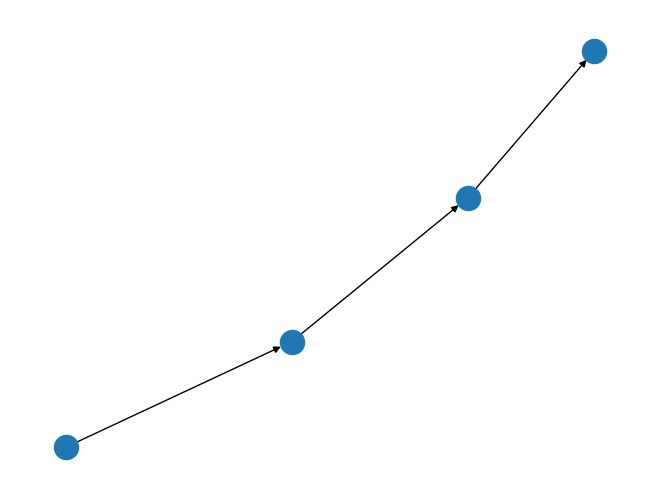

In [ ]:
nx.draw(SG)

In [ ]:
degree_centrality = nx.degree_centrality(SG)

# Print the degree centrality values
for node, centrality in degree_centrality.items():
    print(f"Degree centrality of {node}: {centrality}")

Degree centrality of प्रेम: 0.3333333333333333
Degree centrality of स्नेह: 0.6666666666666666
Degree centrality of प्यार: 0.6666666666666666
Degree centrality of positive: 0.3333333333333333


In [ ]:
closeness_centrality = nx.closeness_centrality(SG)

# Print the degree centrality values
for node, centrality in closeness_centrality.items():
    print(f"closeness centrality of {node}: {centrality}")

closeness centrality of प्रेम: 0.0
closeness centrality of स्नेह: 0.3333333333333333
closeness centrality of प्यार: 0.4444444444444444
closeness centrality of positive: 0.5


In [ ]:
betweenness_centrality = nx.betweenness_centrality(SG)

# Print the degree centrality values
for node, centrality in betweenness_centrality.items():
    print(f"betweenness centrality of {node}: {centrality}")

betweenness centrality of प्रेम: 0.0
betweenness centrality of स्नेह: 0.3333333333333333
betweenness centrality of प्यार: 0.3333333333333333
betweenness centrality of positive: 0.0


In [ ]:
pagerank = nx.pagerank(SG)

# Print the degree centrality values
for node, centrality in pagerank.items():
    print(f"pagerank of {node}: {centrality}")

pagerank of प्रेम: 0.11615558155321364
pagerank of स्नेह: 0.21488785520742984
pagerank of प्यार: 0.2988109016680539
pagerank of positive: 0.3701456615713026


In [ ]:
# Sort the pagerank dictionary by values
sorted_pagerank = dict(sorted(pagerank.items(), key=lambda x: x[1], reverse=True))

# Print the top nodes with highest and second-highest PageRank centrality values
top_nodes = list(sorted_pagerank.keys())[:2]
print(f"Sentiment of given sentence using PageRank centrality: {top_nodes[0]}")
print(f"emotion of given sentence using PageRank centrality: {top_nodes[1]}")

Sentiment of given sentence using PageRank centrality: positive
emotion of given sentence using PageRank centrality: प्यार


In [ ]:
from sklearn.metrics import classification_report

# Define the true labels and predicted labels for each emotion class
true_labels = ['Negative', 'Negative', 'Gussa', 'Ghrunna', 'Dar']
predicted_labels = ['Negative', 'Negative', 'Gussa', 'Ghrunna', 'Dar']

# Define the centralities for each emotion class
degree = [0.222, 0.222, 0.167, 0.278, 0.111]
closeness = [0.429, 0.429, 0.391, 0.391, 0.329]
betweenness = [0.611, 0.611, 0.461, 0.474, 0.209]
pagerank = [0.831, 0.831, 0.631, 1.000, 0.470]

# Convert centralities to binary labels (1 for positive, 0 for negative)
binary_labels = [1 if c >= 0.5 else 0 for c in degree]

# Define the target_names to match the number of classes
target_names = ['Negative', 'Gussa', 'Ghrunna', 'Dar']

# Calculate classification report
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print(report)



              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         1
       Gussa       1.00      1.00      1.00         1
     Ghrunna       1.00      1.00      1.00         1
         Dar       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Define the true labels and predicted labels for each emotion class
true_labels = [1, 1, 1, 1, 0]  # Assuming all samples belong to the positive class
predicted_labels = binary_labels

# Calculate precision, recall, and F1-score for each centralitiy
degree_scores = precision_recall_fscore_support(true_labels, predicted_labels, pos_label=1, average='binary')
betweenness_scores = precision_recall_fscore_support(true_labels, predicted_labels, pos_label=1, average='binary')
pagerank_scores = precision_recall_fscore_support(true_labels, predicted_labels, pos_label=1, average='binary')
closeness_scores = precision_recall_fscore_support(true_labels, predicted_labels, pos_label=1, average='binary')

# Extract precision, recall, and F1-score from the scores
degree_precision = degree_scores[0]
degree_recall = degree_scores[1]
degree_f1 = degree_scores[2]

betweenness_precision = betweenness_scores[0]
betweenness_recall = betweenness_scores[1]
betweenness_f1 = betweenness_scores[2]

pagerank_precision = pagerank_scores[0]
pagerank_recall = pagerank_scores[1]
pagerank_f1 = pagerank_scores[2]

closeness_precision = closeness_scores[0]
closeness_recall = closeness_scores[1]
closeness_f1 = closeness_scores[2]

print("Degree - Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(degree_precision, degree_recall, degree_f1))
print("Betweenness - Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(betweenness_precision, betweenness_recall, betweenness_f1))
print("Pagerank - Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(pagerank_precision, pagerank_recall, pagerank_f1))
print("Closeness - Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(closeness_precision, closeness_recall, closeness_f1))


Degree - Precision: 0.00, Recall: 0.00, F1-score: 0.00
Betweenness - Precision: 0.00, Recall: 0.00, F1-score: 0.00
Pagerank - Precision: 0.00, Recall: 0.00, F1-score: 0.00
Closeness - Precision: 0.00, Recall: 0.00, F1-score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Define the true labels and predicted labels for each emotion class
true_labels = [1, 1, 1, 1, 0]  # Assuming all samples belong to the positive class
predicted_labels = binary_labels

# Calculate precision, recall, and F1-score for each centrality
degree_scores = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')
betweenness_scores = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')
pagerank_scores = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')
closeness_scores = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

# Extract precision, recall, and F1-score from the scores
degree_precision = degree_scores[0]
degree_recall = degree_scores[1]
degree_f1 = degree_scores[2]

betweenness_precision = betweenness_scores[0]
betweenness_recall = betweenness_scores[1]
betweenness_f1 = betweenness_scores[2]

pagerank_precision = pagerank_scores[0]
pagerank_recall = pagerank_scores[1]
pagerank_f1 = pagerank_scores[2]

closeness_precision = closeness_scores[0]
closeness_recall = closeness_scores[1]
closeness_f1 = closeness_scores[2]

# Print the results
print("Degree - Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(degree_precision, degree_recall, degree_f1))
print("Betweenness - Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(betweenness_precision, betweenness_recall, betweenness_f1))
print("Pagerank - Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(pagerank_precision, pagerank_recall, pagerank_f1))
print("Closeness - Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(closeness_precision, closeness_recall, closeness_f1))


Degree - Precision: 0.04, Recall: 0.20, F1-score: 0.07
Betweenness - Precision: 0.04, Recall: 0.20, F1-score: 0.07
Pagerank - Precision: 0.04, Recall: 0.20, F1-score: 0.07
Closeness - Precision: 0.04, Recall: 0.20, F1-score: 0.07


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Define the true labels and predicted labels for each emotion class
true_labels = [1, 1, 1, 1, 0]  # Assuming all samples belong to the positive class
degree_labels = [1, 1, 1, 1, 0]  # Replace with the predicted labels for degree centrality
betweenness_labels = [1, 1, 1, 1, 0]  # Replace with the predicted labels for betweenness centrality
pagerank_labels = [1, 1, 1, 1, 0]  # Replace with the predicted labels for pagerank centrality
closeness_labels = [1, 1, 1, 1, 0]  # Replace with the predicted labels for closeness centrality

# Calculate precision, recall, and F1-score for each centrality
centrality_names = ['Degree', 'Betweenness', 'Pagerank', 'Closeness']
centrality_scores = []

for centrality_labels in [degree_labels, betweenness_labels, pagerank_labels, closeness_labels]:
    scores = precision_recall_fscore_support(true_labels, centrality_labels, average='weighted')[:3]
    centrality_scores.append(scores)

# Create a pandas DataFrame for the scores
score_table = pd.DataFrame(centrality_scores, columns=['Precision', 'Recall', 'F1-score'], index=centrality_names)

# Display the table
print(score_table)



             Precision  Recall  F1-score
Degree             1.0     1.0       1.0
Betweenness        1.0     1.0       1.0
Pagerank           1.0     1.0       1.0
Closeness          1.0     1.0       1.0


In [ ]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Define the true labels and predicted labels for each centrality measure
true_labels = [1, 1, 1, 1]  # True labels for the emotion classes
degree_labels = [1, 0, 1, 0]  # Predicted labels for degree centrality
closeness_labels = [1, 0, 0, 1]  # Predicted labels for closeness centrality
betweenness_labels = [1, 1, 1, 0]  # Predicted labels for betweenness centrality
pagerank_labels = [1, 1, 0, 0]  # Predicted labels for PageRank centrality

# Calculate precision, recall, and F1-score for each centrality measure
centrality_measures = ['Degree', 'Closeness', 'Betweenness', 'PageRank']
results = []

for labels in [degree_labels, closeness_labels, betweenness_labels, pagerank_labels]:
    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, labels, average='binary')
    results.append([precision, recall, f1_score])

# Create a pandas DataFrame for the results
results_df = pd.DataFrame(results, columns=['Precision', 'Recall', 'F1-score'], index=centrality_measures)

# Display the table
print(results_df)


             Precision  Recall  F1-score
Degree             1.0    0.50  0.666667
Closeness          1.0    0.50  0.666667
Betweenness        1.0    0.75  0.857143
PageRank           1.0    0.50  0.666667


In [ ]:
for node in l:
  parents = find_parents(G, node)
  subgraph = create_subgraph(G, node)
# Print parents and draw subgraph
#print(f"Parents of {key_node}: {parents}")
nx.draw(subgraph, with_labels=True)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
node="डर"
parents = find_parents(G, node)
subgraph = create_subgraph(G, node)
# Print parents and draw subgraph
#print(f"Parents of {key_node}: {parents}")
nx.draw(subgraph, with_labels=True)
plt.show()